In [1]:
from google.colab import files
data=files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
#finding the columns have null values
null_column=df.columns[df.isnull().any()].tolist()
null_column

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
print("Missing values in each columns are-")
df.isna().sum()

Missing values in each columns are-


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


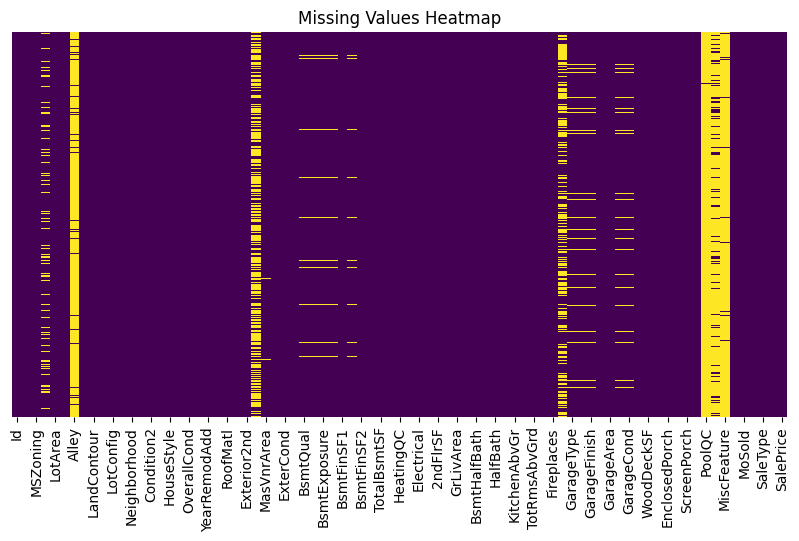

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# finding the numerical and the categorical columns for data processing
numerical_cols=df.select_dtypes(include=np.number).columns
categorical_cols=df.select_dtypes(exclude=np.number).columns

In [12]:
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
# Remove empty row if exists
df = df.dropna(how='all')

In [15]:
# Replace 'NA' with actual NaN
df = df.replace('NA', np.nan)

In [19]:
#handling missing values
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

In [20]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [21]:
df.isna().any()

,0
Id,False
MSSubClass,False
MSZoning,False
LotFrontage,False
LotArea,False
...,...
MoSold,False
YrSold,False
SaleType,False
SaleCondition,False


**Feature Engineering**

In [22]:
#create new features
# 1. Create new features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['Age'] = df['YrSold'].astype(int) - df['YearBuilt']
df['RemodAge'] = df['YrSold'].astype(int) - df['YearRemodAdd']

df.drop(columns=[
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'YearBuilt', 'YearRemodAdd'
], inplace=True)


In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', '

In [24]:
skewness = df.skew(numeric_only=True)

print("Skewness of columns:\n", skewness)

threshold = 1.0
skewed_columns = skewness[abs(skewness) > threshold].index.tolist()

Skewness of columns:
 Id               0.000000
MSSubClass       1.407657
LotFrontage      2.409147
LotArea         12.207688
OverallQual      0.216944
OverallCond      0.693067
MasVnrArea       2.677616
BsmtFinSF1       1.685503
BsmtFinSF2       4.255261
BsmtUnfSF        0.920268
LowQualFinSF     9.011341
GrLivArea        1.366560
BedroomAbvGr     0.211790
KitchenAbvGr     4.488397
TotRmsAbvGrd     0.676341
Fireplaces       0.649565
GarageYrBlt     -0.678333
GarageCars      -0.342549
GarageArea       0.179981
WoodDeckSF       1.541376
PoolArea        14.828374
MiscVal         24.476794
MoSold           0.212053
YrSold           0.096269
SalePrice        1.882876
TotalSF          1.776700
TotalBath        0.264676
TotalPorch       2.000029
Age              0.609030
RemodAge         0.502489
dtype: float64


In [25]:
skewed_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenAbvGr',
 'WoodDeckSF',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'TotalSF',
 'TotalPorch']

In [26]:
for col in skewed_columns:
    df[col] = np.log1p(df[col])

In [27]:
# Label encode ordinal categoricals
ordinal_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,
    'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1,
    'Fin': 3, 'RFn': 2, 'Unf': 1,
    'GLQ': 4, 'ALQ': 3, 'BLQ': 2, 'Rec': 1, 'LwQ': 1, 'Unf': 0
}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
               'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Functional',
               'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']

for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].map(ordinal_mapping).fillna(0)

# One-hot encode nominal categoricals
nominal_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
               'SaleCondition']

nominal_cols = [col for col in nominal_cols if col in df.columns]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [28]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,4.110874,4.189655,9.042040,7.0,5.0,5.283204,4,3,4,...,False,False,False,False,True,False,False,False,True,False
1,2.0,3.044522,4.394449,9.169623,6.0,8.0,0.000000,3,3,4,...,False,False,False,False,True,False,False,False,True,False
2,3.0,4.110874,4.234107,9.328212,7.0,5.0,5.093750,4,3,4,...,False,False,False,False,True,False,False,False,True,False
3,4.0,4.262680,4.110874,9.164401,7.0,5.0,0.000000,3,3,3,...,False,False,False,False,True,False,False,False,False,False
4,5.0,4.110874,4.442651,9.565284,8.0,5.0,5.860786,4,3,4,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,4.110874,4.143135,8.976894,6.0,5.0,0.000000,3,3,4,...,False,False,False,False,True,False,False,False,True,False
1456,1457.0,3.044522,4.454347,9.486152,6.0,6.0,4.787492,3,3,4,...,False,False,False,False,True,False,False,False,True,False
1457,1458.0,4.262680,4.204693,9.109746,7.0,9.0,0.000000,5,4,3,...,False,False,False,False,True,False,False,False,True,False
1458,1459.0,3.044522,4.234107,9.181735,5.0,6.0,0.000000,3,3,3,...,False,False,False,False,True,False,False,False,True,False


In [29]:
# Feature Selection
threshold = len(df) * 0.9
df = df.loc[:, df.nunique() > len(df) - threshold]
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df = df.drop(columns=to_drop)

In [31]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols_to_scale = df.select_dtypes(include=[np.number]).columns
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

In [32]:
df.columns

Index(['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'SalePrice', 'TotalSF', 'TotalPorch'],
      dtype='object')

In [33]:
print(f"Final dataset shape: {df.shape}")
print(f"Columns in final dataset: {df.columns.tolist()}")

Final dataset shape: (1460, 11)
Columns in final dataset: ['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'SalePrice', 'TotalSF', 'TotalPorch']


**Apply the Regression Techniques**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor as RFR, GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [35]:
# Applying different models

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LR(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RFR(n_estimators=100, random_state=42),
    'Gradient Boosting': GBR(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R² Score: {r2:.4f}\n")


Linear Regression:
  RMSE: 0.51
  R² Score: 0.7764

Ridge Regression:
  RMSE: 0.51
  R² Score: 0.7764

Lasso Regression:
  RMSE: 0.57
  R² Score: 0.7208

Random Forest:
  RMSE: 0.48
  R² Score: 0.7999

Gradient Boosting:
  RMSE: 0.48
  R² Score: 0.8028



**Hyper-parameter Tuning**

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
# GridSearch parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# RandomizedSearch parameter grid
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [40]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)

best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

print("R² Score (GridSearch):", r2_score(y_test, y_pred_grid))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_grid))
print("RMSE (GridSearch):", rmse)


Best Parameters from GridSearchCV:
 {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
R² Score (GridSearch): 0.79685516057018
RMSE (GridSearch): 0.48759433411431913


In [41]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Parameters from RandomizedSearchCV:\n", random_search.best_params_)

best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

print("R² Score (RandomizedSearch):", r2_score(y_test, y_pred_random))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_grid))
print("RMSE (RandomizedSearchCV):", rmse)


Best Parameters from RandomizedSearchCV:
 {'n_estimators': np.int64(250), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': np.int64(20)}
R² Score (RandomizedSearch): 0.7968443286995804
RMSE (RandomizedSearchCV): 0.48759433411431913
